In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)



In [7]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


df1.groupby('area_type')['area_type].agg(count)



In [12]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [19]:
df1.groupby('area_type').agg('count')
df2= df1.drop(['area_type', 'society','balcony','availability'],axis='columns')
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [21]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [23]:
df3= df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [24]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [32]:
df3['bhk']=df3['size'].apply(lambda x:int( x.split(' ')[0]))

C:\Users\Acer\AppData\Local\Temp\ipykernel_8648\1466528402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int( x.split(' ')[0]))


In [50]:
df3[df3.bhk>15]


,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,0,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,0,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,0,16.0,550.0,16
4684,Munnekollal,43 Bedroom,0,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,0,18.0,200.0,18


In [51]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [128]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df3.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


df3.total_sqft.unique()

In [145]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [146]:
df3.head(31)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [149]:
df3['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object

In [133]:
df2['total_sqft']= df3['total_sqft']


In [154]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

array([0], dtype=int64)

array([0], dtype=int64)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


C:\Users\Acer\AppData\Local\Temp\ipykernel_8648\2091176801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft']= df1['total_sqft']


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


ValueError: could not convert string to float: '2100 - 2850'

In [66]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [69]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [155]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [168]:
def convert(x):
    val = x.split('-')
    if len(val)== 2:
        return (float (val[0])+float(val[1]))/2
    try:
        return float(x)
    except:
        return None
df3.head(31)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [169]:
df3.head(10)
convert(2100 - 2850)

AttributeError: 'int' object has no attribute 'split'

In [158]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [159]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [160]:
df4 = df3.copy()
df4.head(31)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [161]:

df4['total_sqft']= df4['total_sqft'].apply(convert)
df4.head(31)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [162]:
df4[~df4['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk


In [163]:
df4.loc[132]

location      Electronic City
size                    2 BHK
total_sqft              880.0
bath                      1.0
price                    16.5
bhk                         2
Name: 132, dtype: object

In [164]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [165]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [166]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 
    


In [167]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [170]:
df4[~df4['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk


In [171]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [172]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

sa


In [175]:
df5= df4.copy()
df5['ppsq']= df5['price']*100000/df5['total_sqft']

In [176]:
df5.head()

,location,size,total_sqft,bath,price,bhk,ppsq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [177]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [182]:
len(df5.location.unique())

1298

In [202]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stat = df5.groupby('location').location.agg('count').sort_values(ascending = False)
location_stat

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [204]:
len(location_stat[location_stat<10])

1033

In [206]:
other = location_stat[location_stat<10]
other

location
Kaverappa Layout         9
B Narayanapura           9
2nd Phase JP Nagar       9
Banagiri Nagar           9
Chandra Layout           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Kannur                   1
whitefiled               1
Name: location, Length: 1033, dtype: int64

In [211]:
df5['other'] = other


df5.location = df5.location.apply(lambda x: 'other' if x in location_stat else x)
len(df5.location.unique())

1

In [212]:
df5.head()

,location,size,total_sqft,bath,price,bhk,ppsq,other
0,other,2 BHK,1056.0,2.0,39.07,2,3699.810606,NaN
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,NaN
2,other,3 BHK,1440.0,2.0,62.00,3,4305.555556,NaN
3,other,3 BHK,1521.0,3.0,95.00,3,6245.890861,NaN
4,other,2 BHK,1200.0,2.0,51.00,2,4250.000000,NaN


In [213]:
df5.location= df4.location.copy()

In [214]:
df5.head()

,location,size,total_sqft,bath,price,bhk,ppsq,other
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,NaN
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,NaN
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,NaN
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,NaN
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,NaN


In [216]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stat else x)
df5.location.unique()

array(['other', ' Thanisandra', ' Mysore Highway', ' Devarachikkanahalli',
       'Off Sarjapur Road, ', 'Hoodi Circle, ',
       'Yemlur, Old Airport Road, ', 'ECC Road, Whitefield, ',
       'Sarjapur Road, ', 'Varthur Road, ', ' ittamadu',
       'Thanisandra Main Road, ', ' Bhoganhalli', ' Anekal',
       'Kudlu Village, ', 'Banaswadi, ', ' Devarabeesana Halli',
       ' Rachenahalli', 'Off Sarjapur road, ', 'JP Nagar 8th Phase, ',
       'JP nagar 9th Phase, ', 'Near Electronic City, ',
       'JP Nagar 7th Phase, ', ' Electronic City', 'Whitefield, ',
       ' Whitefield', 'Bellandur, ', ' south',
       'Judicial Layout, Kanakapura Road, ', 'Whietfield, ',
       ' Basavangudi', ' Sector 1 HSR Layout',
       'Electronic city Phase 1, ', ' Banaswadi',
       'HSR Layout 7th sector, ', 'Jayanagar, ', 'Haralur Road, ',
       'Panathur Road, ', 'Electronic city phase 1, ', 'Banasawadi, ',
       'Kanakapura Road, ', 'Electronic City Phase 1, '], dtype=object)

In [217]:
df5.location= df4.location.copy()

In [218]:
len(location_stat[location_stat<10])

1033

In [219]:
del df5['other']

In [221]:
df5.head()

,location,size,total_sqft,bath,price,bhk,ppsq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [223]:
location_stats_less_than_10 = location_stat[location_stat<=10]

len(df5.location.unique())

1298

In [224]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

282

In [228]:
location_stats_less_than_10
df5.head()

,location,size,total_sqft,bath,price,bhk,ppsq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [233]:

df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,ppsq
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [235]:
df5.shape

(13200, 7)

In [238]:
df6= df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [241]:
df6.ppsq.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: ppsq, dtype: float64

In [243]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.ppsq)
        st = np.std(subdf.ppsq)
        reduced_df = subdf[(subdf.ppsq>(m-st)) & (subdf.ppsq<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10202, 7)

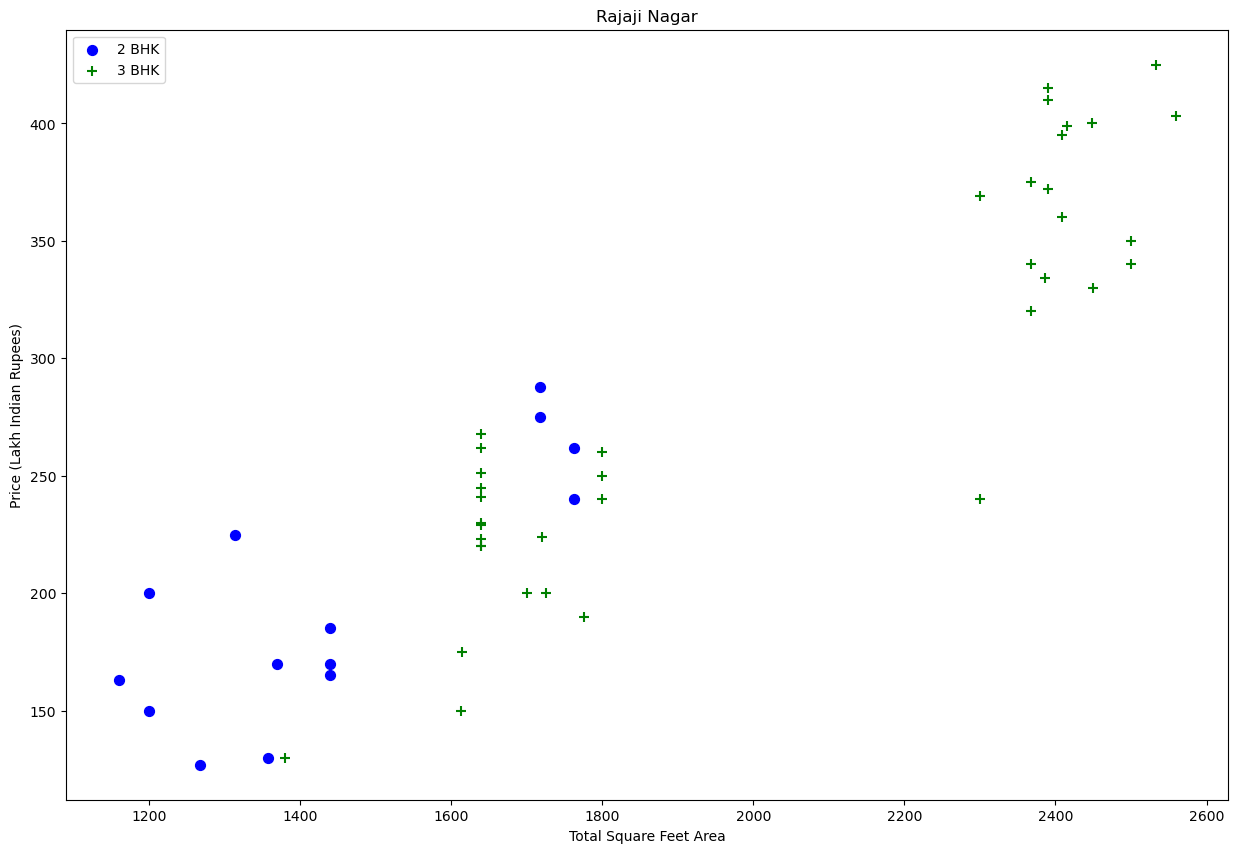

In [244]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [246]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.ppsq),
                'std': np.std(bhk_df.ppsq),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.ppsq<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7313, 7)

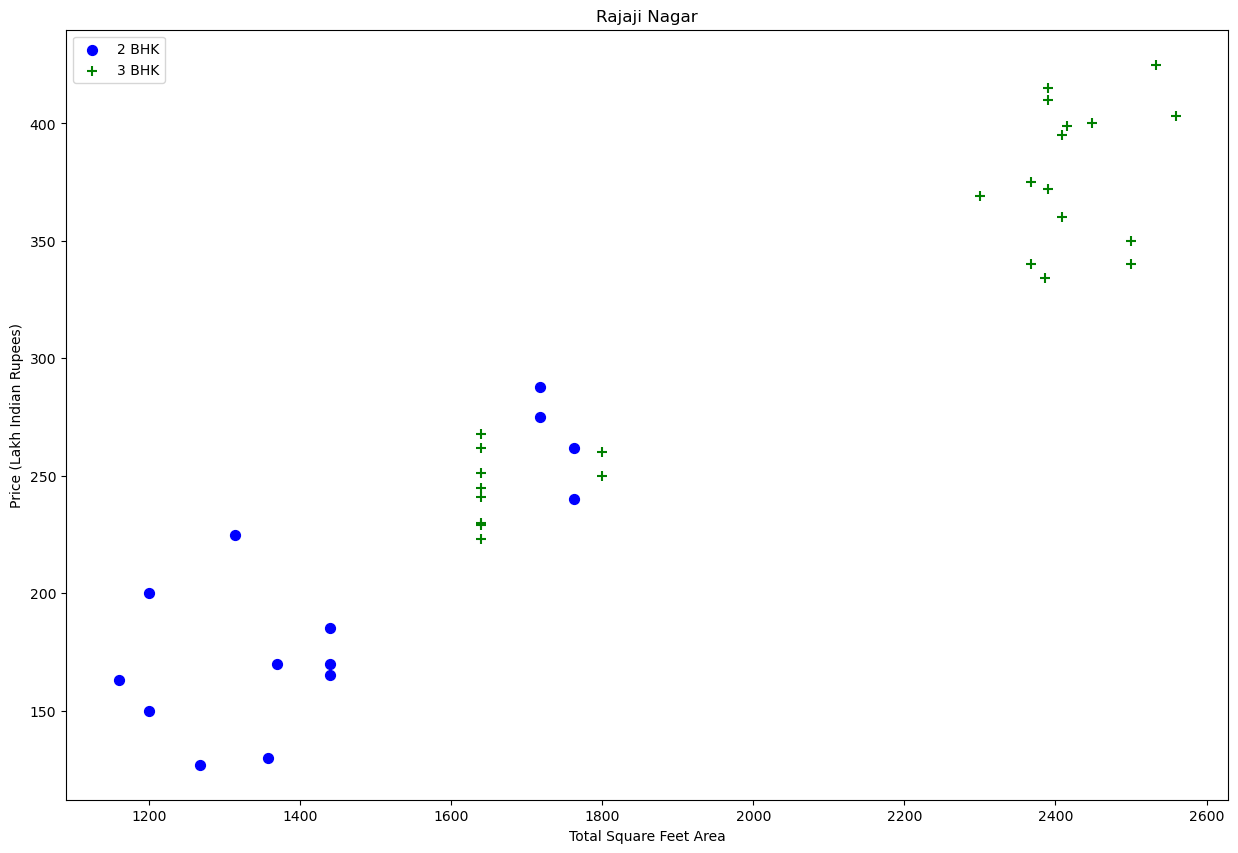

In [247]:
plot_scatter_chart(df8,"Rajaji Nagar")


In [250]:
df8.location.unique()

array([' Devarabeesana Halli', ' Devarachikkanahalli', ' Electronic City',
       ' Mysore Highway', ' Rachenahalli', ' Thanisandra', ' south',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur

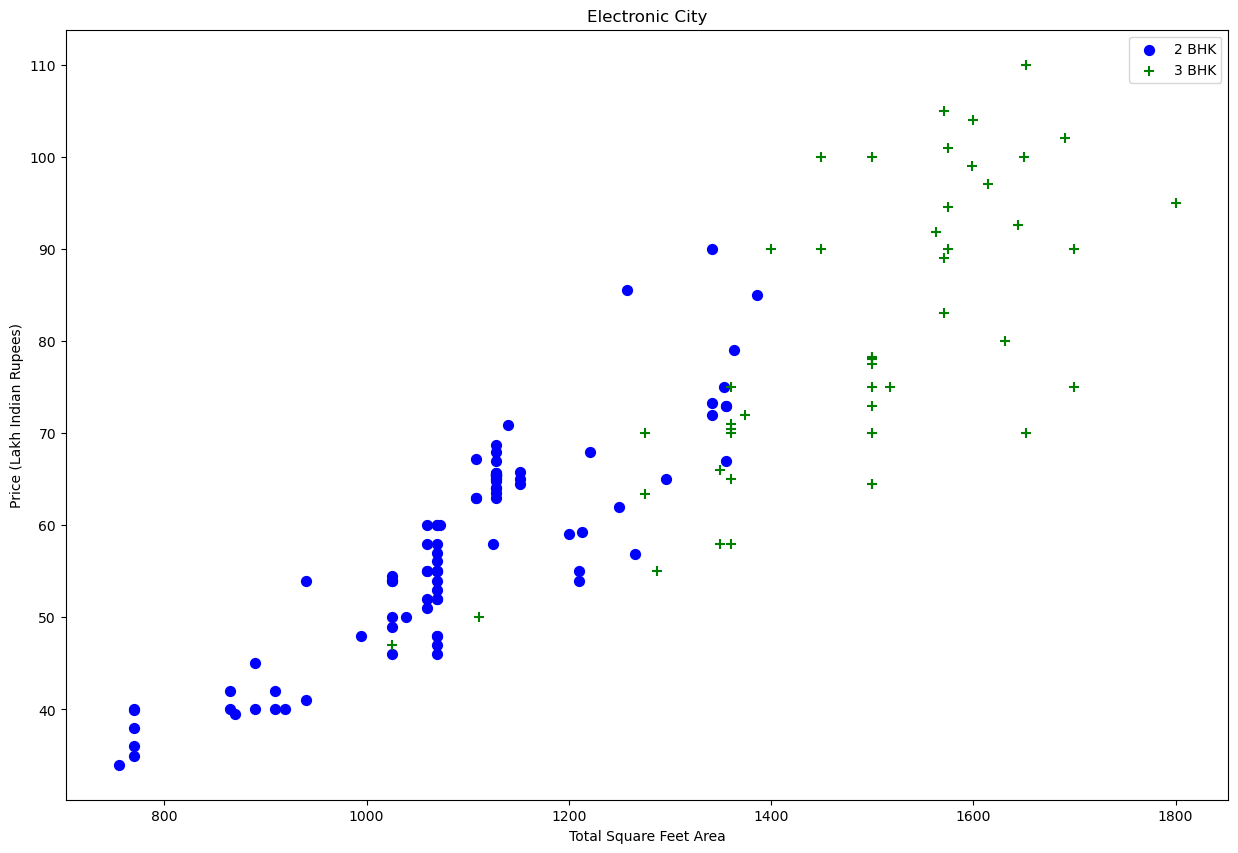

In [251]:
plot_scatter_chart(df8,"Electronic City")


In [252]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.ppsq),
                'std': np.std(bhk_df.ppsq),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.ppsq<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape


(7313, 7)

Text(0, 0.5, 'Count')

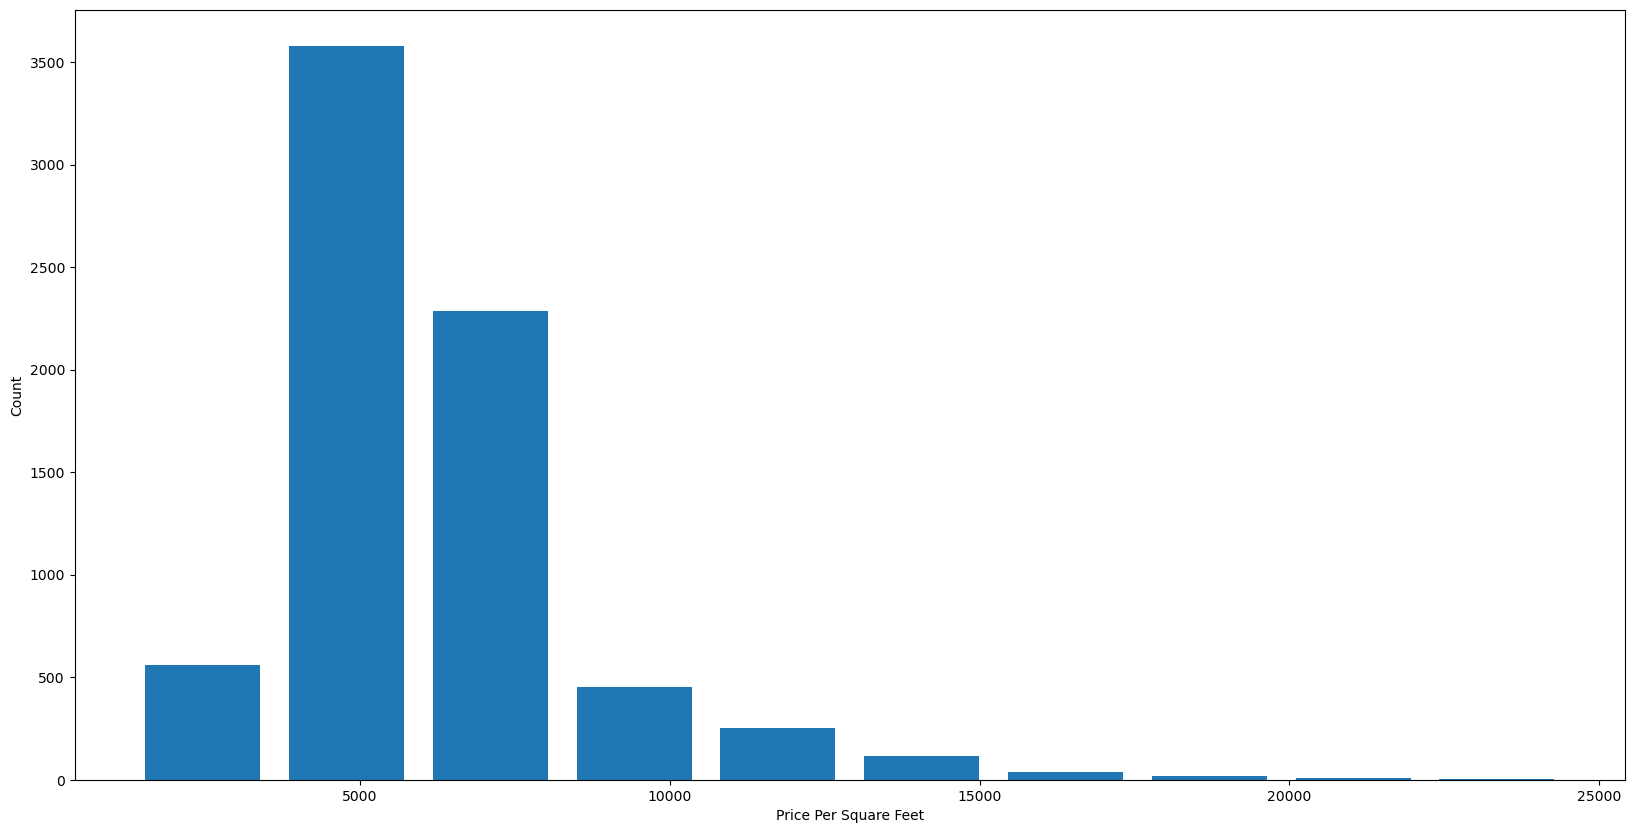

In [254]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.ppsq,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [256]:
df8.shape

(7313, 7)

In [257]:
df8.head()

,location,size,total_sqft,bath,price,bhk,ppsq
0,Devarabeesana Halli,3 BHK,1672.0,3.0,150.0,3,8971.291866
1,Devarabeesana Halli,3 BHK,1750.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,3 BHK,1750.0,3.0,150.0,3,8571.428571
4,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
5,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667


In [258]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7235, 7)

In [259]:
df9.head()

,location,size,total_sqft,bath,price,bhk,ppsq
0,Devarabeesana Halli,3 BHK,1672.0,3.0,150.0,3,8971.291866
1,Devarabeesana Halli,3 BHK,1750.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,3 BHK,1750.0,3.0,150.0,3,8571.428571
4,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
5,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667


In [261]:
df10 = df9.drop(['size','ppsq'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3


In [262]:
pd.get_dummies(df10.location)

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [264]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)


,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarabeesana Halli,1672.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1750.0,3.0,149.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarabeesana Halli,1750.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1250.0,2.0,40.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,1200.0,2.0,83.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [268]:
df12.shape

(7235, 262)

In [269]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
X.shape

(7235, 261)

In [271]:
y = df12.price
y.head(3)

0    150.0
1    149.0
2    150.0
Name: price, dtype: float64

In [272]:
len(y)

7235

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [275]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.7986303117241503

In [276]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 8.06909490e-01, -2.05178088e+14,  8.14583626e-01, -1.09651816e+16,
        8.50122172e-01])

In [279]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [280]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [281]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.35000294095798

In [282]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.70896529703569

In [283]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


182.86026154937596

In [284]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


188.21922390545367

In [285]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)